In [1]:
!python functions.py
## note after making changes,kernel must be restarted for changes to apply 

In [2]:
import functions
import datasets
from sklearn.model_selection import train_test_split

C:\Users\theot\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [3]:
DS = datasets.Datasets()
tweets = DS.tweets_df
retweets = DS.retweets_df
twitter = tweets.append(retweets)
data_name = "twitter"## to be changed
    
data = twitter 

    

dfH = data.loc[data['BCandidate']==0,:]
dfT =data.loc[data['BCandidate']==1,:]
dfH
    

data.dtypes

File Name                                       object
BCandidate                                       int64
Content_Category                                object
Num Prop                                       float64
Loaded_Language                                float64
Name_Calling,Labeling                          float64
Repetition                                     float64
Exaggeration,Minimisation                      float64
Doubt                                          float64
Appeal_to_fear-prejudice                       float64
Flag-Waving                                    float64
Causal_Oversimplification                      float64
Slogans                                        float64
Appeal_to_Authority                            float64
Black-and-White_Fallacy                        float64
Thought-terminating_Cliches                    float64
Whataboutism,Straw_Men,Red_Herring             float64
Obfuscation,Intentional_Vagueness,Confusion    float64
Bandwagon,

22830


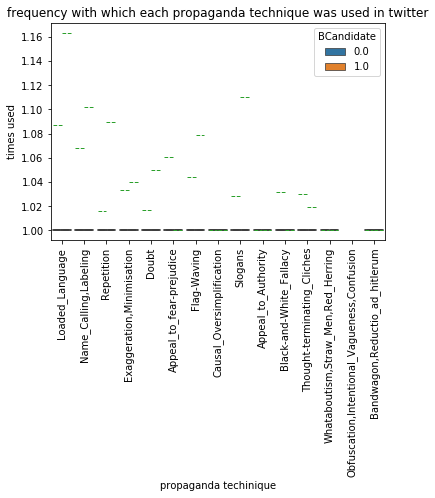

In [4]:
functions.boxplotting(data,data_name)

In [5]:
def twitter_loop():
    DS = datasets.Datasets()
    tweets = DS.tweets_df
    retweets = DS.retweets_df
    twitter = tweets.append(retweets)
    data_name = "twitter"## to be changed
    
    data = twitter 
    data = functions.balance_data(data)
    
    X = data.loc[:,"Num Prop":"Bandwagon,Reductio_ad_hitlerum",]
    assert((X.dtypes =='float64').all())
    Y = data.loc[:,"BCandidate"]

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)
   
    RF_ET_name = ['extra trees', 'random forest']
    for name in RF_ET_name:
        model, param_grid = functions.choose_model(name)
        trained_model = functions.model_training(model,X_train, Y_train, param_grid)
        filename = functions.save_model(trained_model,name,data_name)
        loaded_model = functions.scorer(filename, X_test, Y_test)
        functions.graph_MDI_importance(X_train,Y_train,loaded_model,name, data_name)
        functions.show_permutation_feature_importance(loaded_model, X_train, Y_train, name, data_name)
        print(name + ': Done!')

    
    SVM_LO_NN = ["support vector machine",'neural net']#'lasso', ## this cannot be used because it cannon predict by classification
    for name in SVM_LO_NN :
        model, param_grid = functions.choose_model(name)
        trained_model = functions.model_training(model,X_train, Y_train, param_grid)
        filename = functions.save_model(trained_model,name,data_name)
        loaded_model = functions.scorer(filename, X_test, Y_test)
        print(name + ': Done!')
    
    #functions.barchart(data, data_name)
    #functions.boxplotting(data)
    
        
twitter_loop()

HC length:  1522
DT length:  3038
missing_rows: 1516 row_fraction: 0.9960578186596584
DT length ratio:  0.5


KeyboardInterrupt: 

In [ ]:
functions.barchart(data, data_name)